# Sales Data Analysis (2019)

This notebook performs an analysis of 2019 sales data to identify key trends and patterns.

## 1. Importing necessary libraries.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib as Path

##2. Data Loading and Preparation

This section focuses on loading the sales data from multiple files.

In [2]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
year = '2019'
adf = pd.DataFrame()

for month in months:
  file_name = f'Sales_{month}_{year}.csv'
  try:
    df = pd.read_csv(file_name)
    adf = pd.concat([adf, df], ignore_index=True)
  except FileNotFoundError:
    print(f"File not found: {file_name}")

print(adf)


       Order ID                     Product Quantity Ordered Price Each  \
0        141234                      iPhone                1        700   
1        141235    Lightning Charging Cable                1      14.95   
2        141236            Wired Headphones                2      11.99   
3        141237            27in FHD Monitor                1     149.99   
4        141238            Wired Headphones                1      11.99   
...         ...                         ...              ...        ...   
186845   319666    Lightning Charging Cable                1      14.95   
186846   319667       AA Batteries (4-pack)                2       3.84   
186847   319668             Vareebadd Phone                1        400   
186848   319669            Wired Headphones                1      11.99   
186849   319670  Bose SoundSport Headphones                1      99.99   

            Order Date                        Purchase Address  
0       01/22/19 21:25         944

## 3. Data Cleaning and Transformation

Here, we clean the column names, convert data types, handle missing values, and create new features for analysis.

In [8]:
adf.isnull().sum()

,0
order_id,0
product,0
quantity_ordered,0
price_each,0
order_date,0
purchase_address,0


In [7]:
adf = adf.dropna()

In [4]:
adf.columns = adf.columns.str.lower()
adf.columns = adf.columns.str.replace(' ', '_')
adf.columns = adf.columns.str.replace('[^a-zA-Z0-9_]', '', regex=True)

In [5]:
adf.dtypes

,0
order_id,object
product,object
quantity_ordered,object
price_each,object
order_date,object
purchase_address,object


In [6]:
adf['order_date'] = pd.to_datetime(adf['order_date'], format='%m/%d/%y %H:%M', errors='coerce')
adf['quantity_ordered'] = pd.to_numeric(adf['quantity_ordered'], errors='coerce')
adf['price_each'] = pd.to_numeric(adf['price_each'], errors='coerce')


In [ ]:
adf.info()
adf.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 72871 entries, 3 to 186848
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          72871 non-null  object        
 1   product           72871 non-null  object        
 2   quantity_ordered  72871 non-null  float64       
 3   price_each        72871 non-null  float64       
 4   order_date        72871 non-null  datetime64[ns]
 5   purchase_address  72871 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 3.9+ MB


,quantity_ordered,price_each,order_date
count,72871.000000,72871.000000,72871
mean,1.123314,186.250801,2007-07-11 11:13:44.584814080
min,1.000000,2.990000,2001-01-19 03:07:00
25%,1.000000,11.950000,2004-06-19 19:38:30
50%,1.000000,14.950000,2007-06-19 16:47:00
75%,1.000000,150.000000,2010-10-19 12:29:00
max,8.000000,1700.000000,2012-12-19 23:54:00
std,0.439911,334.105814,NaN


In [9]:
adf['month'] = adf['order_date'].dt.month
adf['sales'] = adf['quantity_ordered']*adf['price_each']
adf['citys'] = adf['purchase_address'].str.split(',').str[1].str.strip()

In [10]:
adf

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,citys
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin
...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1.0,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",12,14.95,San Francisco
186846,319667,AA Batteries (4-pack),2.0,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",12,7.68,Los Angeles
186847,319668,Vareebadd Phone,1.0,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",12,400.00,Seattle
186848,319669,Wired Headphones,1.0,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",12,11.99,Dallas


# 4. Exploratory Data Analysis (EDA)

###This section explores different aspects of the sales data through visualizations and summary statistics.


## 4.1 Monthly Sales Analysis

Analyzing and visualizing the total sales for each month of 2019.


In [11]:
monthly_sales = adf.groupby('month')['sales'].sum()
print(monthly_sales)

month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: sales, dtype: float64


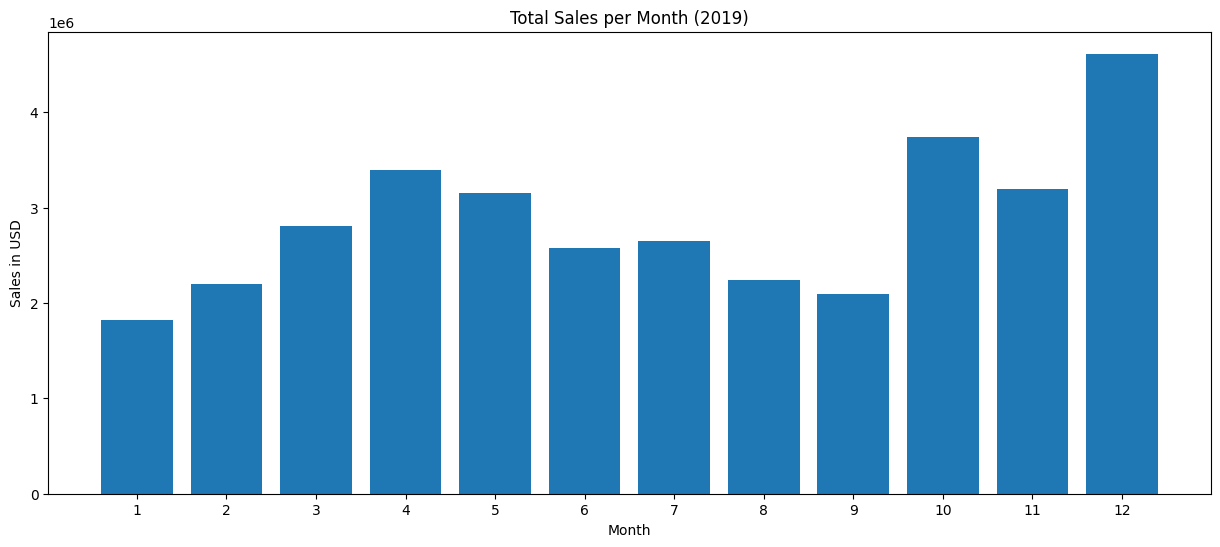

In [21]:
months = range(1, 13)
plt.figure(figsize=(15,6))
plt.bar(monthly_sales.index, monthly_sales.values)
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Sales in USD')
plt.title('Total Sales per Month (2019)')
plt.show()

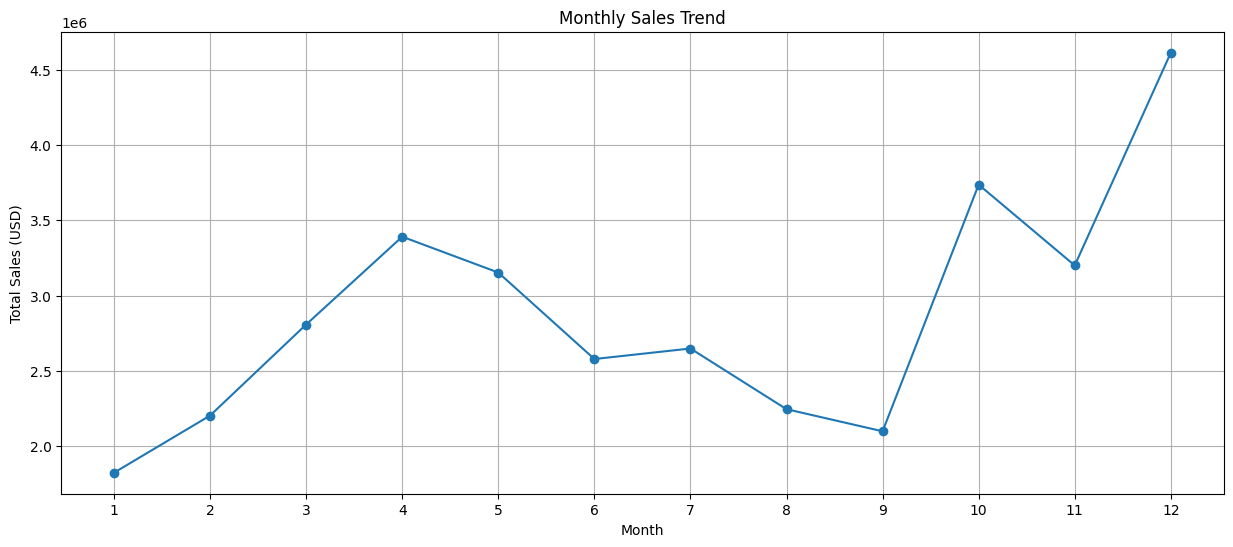

In [28]:
plt.figure(figsize=(15,6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.grid(True)
plt.xticks(range(1,13))
plt.show()


### 4.2 Sales by City Analysis

Investigating sales performance across different cities

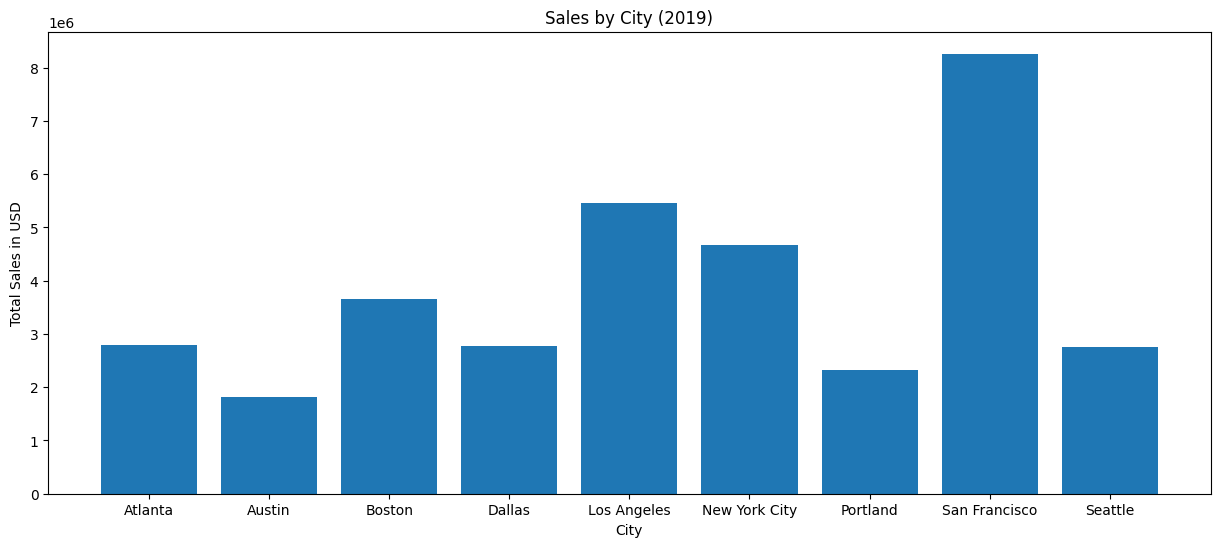

In [13]:


city_sales = adf.groupby('citys')['sales'].sum()
cities = city_sales.index
sales_values = city_sales.values

plt.figure(figsize=(15,6))
plt.bar(cities, sales_values)
plt.xticks(rotation=0)
plt.xlabel('City')
plt.ylabel('Total Sales in USD')
plt.title('Sales by City (2019)')
plt.show()

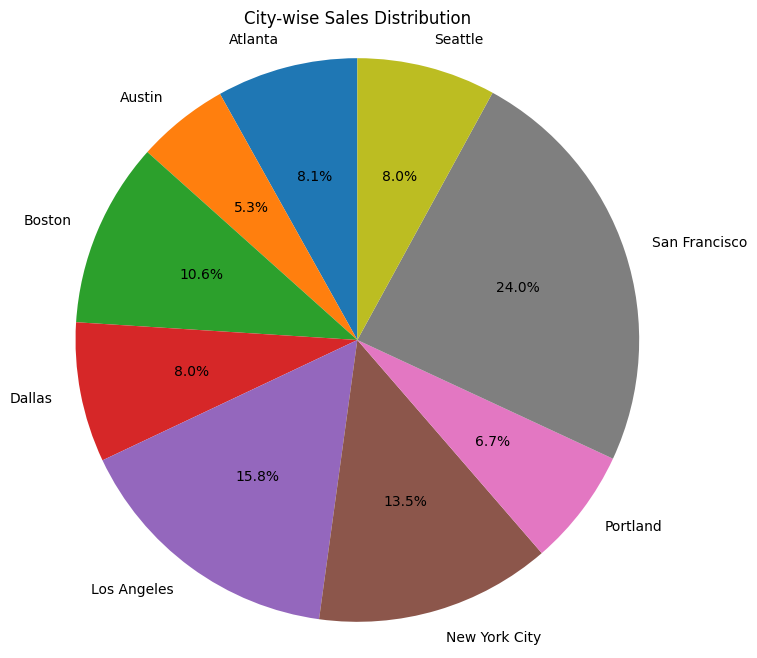

In [14]:
city_sales = adf.groupby('citys')['sales'].sum()
plt.figure(figsize=(8,8))
plt.pie(city_sales, labels=city_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('City-wise Sales Distribution')
plt.axis('equal')
plt.show()


##4.3 Hourly Order Analysis
Understanding customer purchase behavior across different hours of the day.

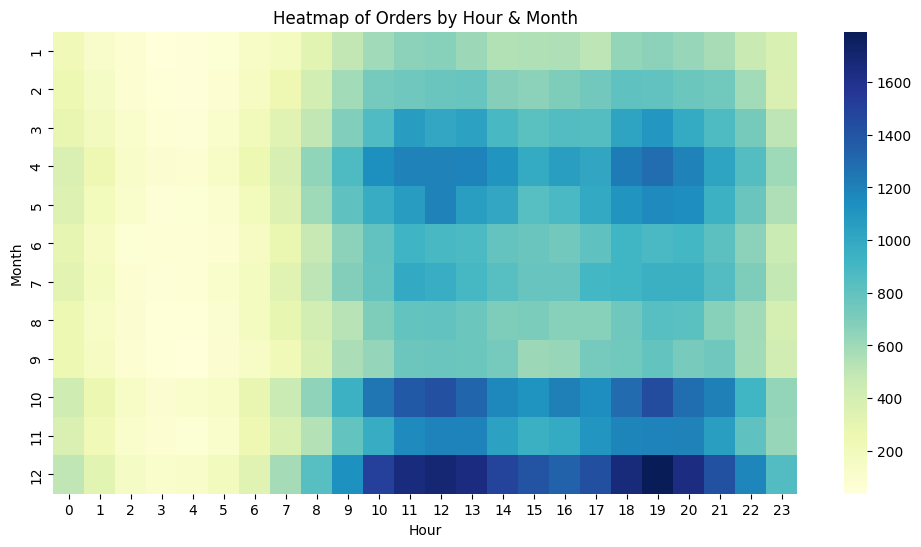

In [18]:
adf['hour'] = pd.to_datetime(adf['order_date']).dt.hour
hour_month = adf.groupby(['month', 'hour']).count()['order_id'].unstack()
plt.figure(figsize=(12,6))
sns.heatmap(hour_month, cmap='YlGnBu')
plt.title('Heatmap of Orders by Hour & Month')
plt.xlabel('Hour')
plt.ylabel('Month')
plt.show()


##4.4 Most Sold Products
Finding the top 10 most frequently ordered products in 2019.

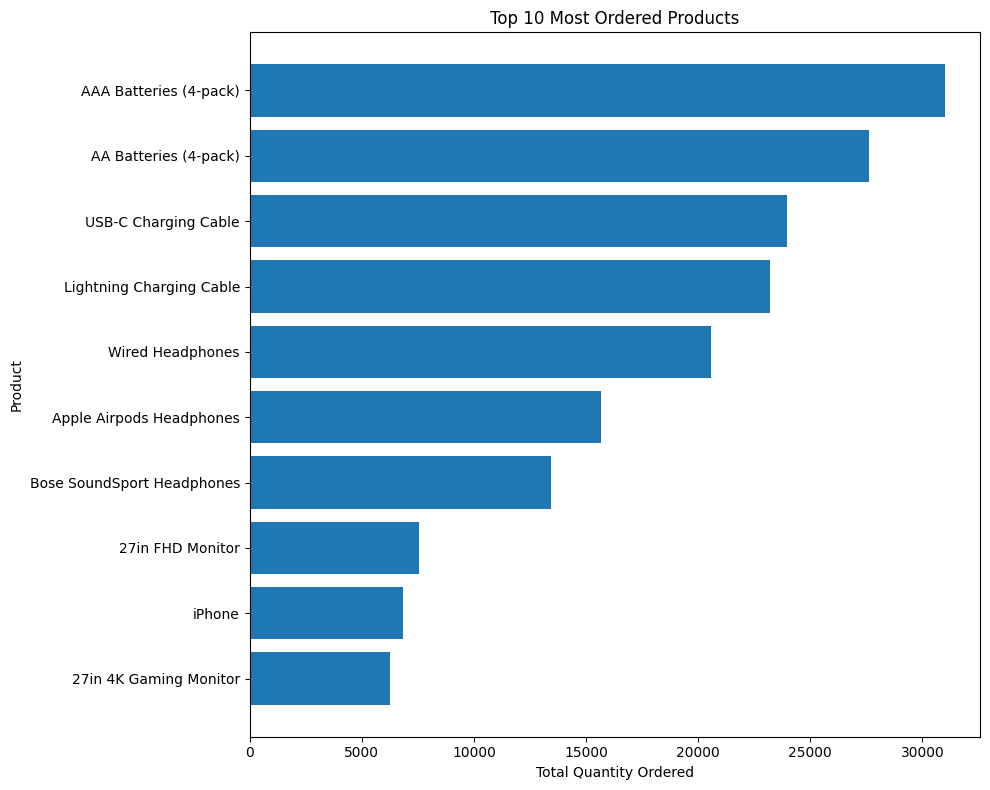

In [34]:
product_quantity = adf.groupby('product')['quantity_ordered'].sum()
product_quantity
top_products = product_quantity.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 8))
plt.barh(top_products.index, top_products.values)
plt.xlabel('Total Quantity Ordered')
plt.ylabel('Product')
plt.title('Top 10 Most Ordered Products')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

##4.5 Sales Trend by Product Price
 Checking if cheaper or mid-range products sell more than expensive ones.

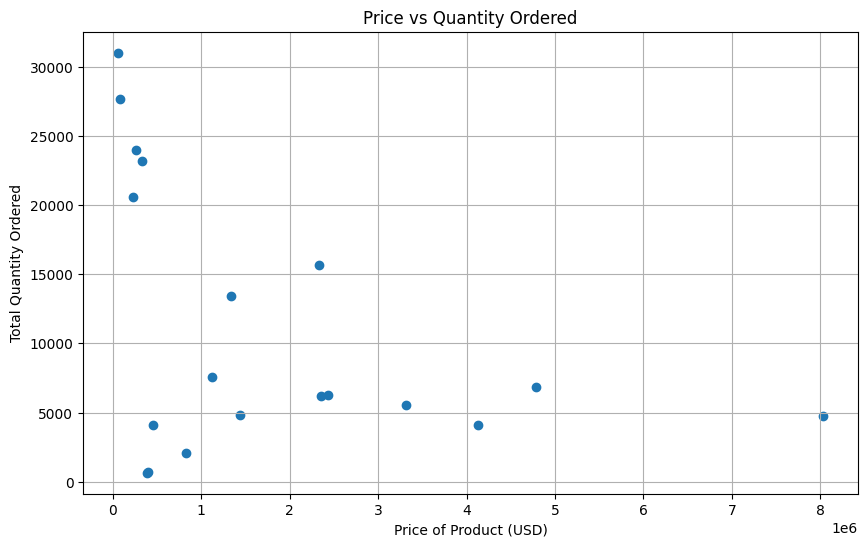

In [ ]:
products = adf.groupby('product')[['quantity_ordered', 'price_each']].sum()
plt.figure(figsize=(10,6))
plt.scatter(products['price_each'], products['quantity_ordered'])
plt.xlabel('Price of Product (USD)')
plt.ylabel('Total Quantity Ordered')
plt.title('Price vs Quantity Ordered')
plt.grid()
plt.show()


## 5. Conclusion

This analysis of 2019 sales data uncovered several actionable insights that can guide strategic decisions in sales, marketing, and operations:

###Monthly Trends:
Sales peaked in **December**, likely driven by holiday shopping, followed by **October**. The lowest sales occurred in **January**, a common trend post-holiday season.

###City Performance:
**San Francisco** and **Los Angeles** emerged as top-performing cities in terms of total sales. Investigating factors such as population density, local promotions, or store presence may explain their strong performance. Cities like Portland and Austin also contributed significantly.

###Hourly Patterns:
Customer orders were highest around **11 AM** and **7 PM**, suggesting strong shopping activity during lunch breaks and evening hours. These patterns can inform decisions about staff scheduling and targeted advertising windows.

###Product Performance:
The most sold items were **AAA Batteries (4-pack)** and **AA Batteries (4-pack)**. A scatter plot analysis of product price vs. quantity ordered reveals a **negative correlation** — lower-priced items are sold in larger volumes, while higher-priced items sell less frequently.

### Final Thoughts:
This project highlights key business insights from sales data, such as seasonal trends, customer behavior, and product preferences. These findings can support:

*   Improved inventory planning .
*   City-wise sales strategies .
*   Time-based marketing campaigns .
*   Smarter product pricing .

By continuing to monitor these metrics and refining based on data, the business can drive more informed, data-backed decisions in the future.